In [8]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

# Đọc dữ liệu từ file CSV
df = pd.read_csv("../jobs_data.csv")

# Tách kỹ năng từ cột skills (nếu chưa được xử lý)
df['skills_list'] = df['skills'].str.lower().str.split(',\s*')

<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21468\1124066684.py:9: SyntaxWarning: invalid escape sequence '\s'
  df['skills_list'] = df['skills'].str.lower().str.split(',\s*')


Phân tích xu hướng kỹ năng

In [9]:
# Gộp toàn bộ kỹ năng từ cột skills_list
all_extracted_skills = df['skills_list'].explode().dropna()

# Đếm tần suất kỹ năng
skill_counter = Counter(all_extracted_skills)

# Chuyển thành DataFrame
skill_df = pd.DataFrame(skill_counter.items(), columns=['Skill', 'Count'])
skill_df = skill_df.sort_values(by='Count', ascending=False)

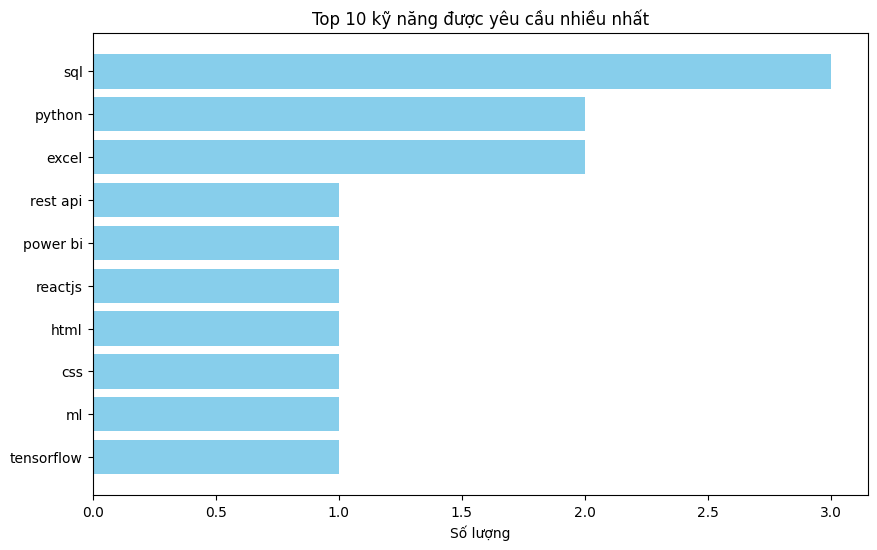

In [10]:
# Lấy top 10 kỹ năng
top_skills = skill_df.head(10)

# Vẽ biểu đồ
plt.figure(figsize=(10,6))
plt.barh(top_skills['Skill'], top_skills['Count'], color='skyblue')
plt.xlabel('Số lượng')
plt.title('Top 10 kỹ năng được yêu cầu nhiều nhất')
plt.gca().invert_yaxis()  # Đảo trục để kỹ năng nhiều nằm trên
plt.show()


Phân tích lương

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

In [12]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv("../jobs_data.csv")

# Hiển thị thông tin cơ bản của dữ liệu
print("Thông tin cơ bản của dữ liệu:")
print(df.info())
print("\nThống kê mô tả:")
print(df.describe())

Thông tin cơ bản của dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               10 non-null     int64 
 1   job_title        10 non-null     object
 2   company_name     10 non-null     object
 3   location         10 non-null     object
 4   salary           10 non-null     object
 5   skills           10 non-null     object
 6   job_description  10 non-null     object
 7   posted_date      10 non-null     object
 8   job_type         10 non-null     object
 9   url              10 non-null     object
dtypes: int64(1), object(9)
memory usage: 932.0+ bytes
None

Thống kê mô tả:
             id
count  10.00000
mean    5.50000
std     3.02765
min     1.00000
25%     3.25000
50%     5.50000
75%     7.75000
max    10.00000


In [13]:
# Xử lý cột lương (salary)
# Giả sử cột salary có định dạng "XX-YYM" (ví dụ: "20-30M")
df[['min_salary', 'max_salary']] = df['salary'].str.extract(r'(\d+)-(\d+)M')
df['min_salary'] = pd.to_numeric(df['min_salary'])
df['max_salary'] = pd.to_numeric(df['max_salary'])
df['avg_salary'] = (df['min_salary'] + df['max_salary']) / 2

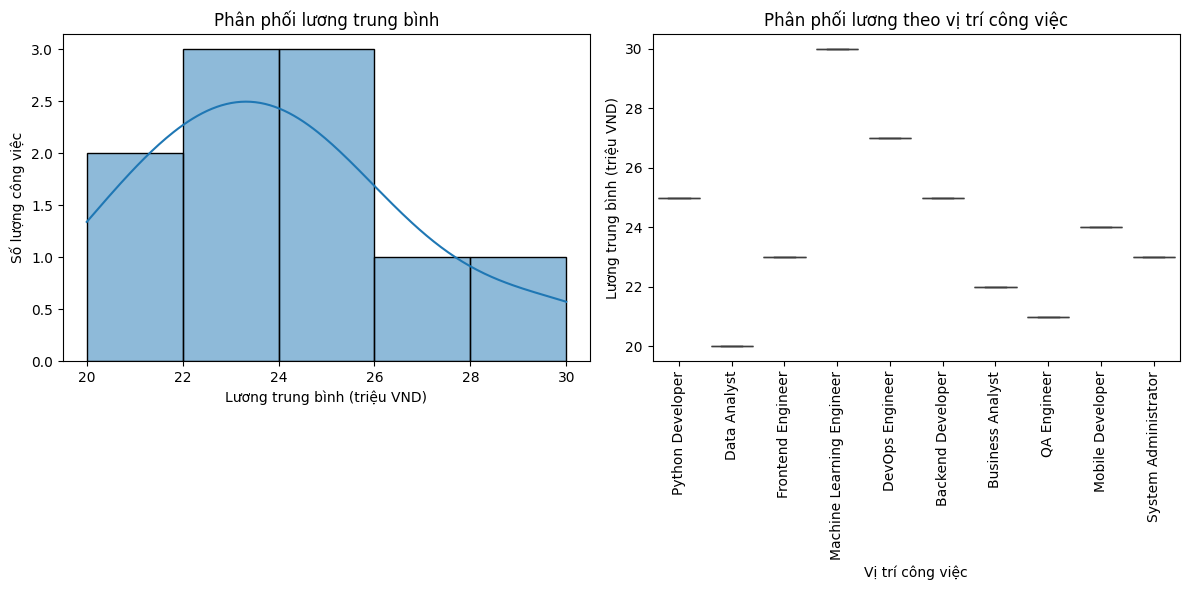

In [14]:
# 1. Phân tích phân phối lương
plt.figure(figsize=(12, 6))

# Histogram cho lương trung bình
plt.subplot(1, 2, 1)
sns.histplot(df['avg_salary'], kde=True)
plt.title('Phân phối lương trung bình')
plt.xlabel('Lương trung bình (triệu VND)')
plt.ylabel('Số lượng công việc')

# Boxplot cho lương theo vị trí công việc
plt.subplot(1, 2, 2)
sns.boxplot(x='job_title', y='avg_salary', data=df)
plt.title('Phân phối lương theo vị trí công việc')
plt.xlabel('Vị trí công việc')
plt.ylabel('Lương trung bình (triệu VND)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21468\4192448816.py:3: SyntaxWarning: invalid escape sequence '\s'
  df['skills_list'] = df['skills'].str.lower().str.split(',\s*')


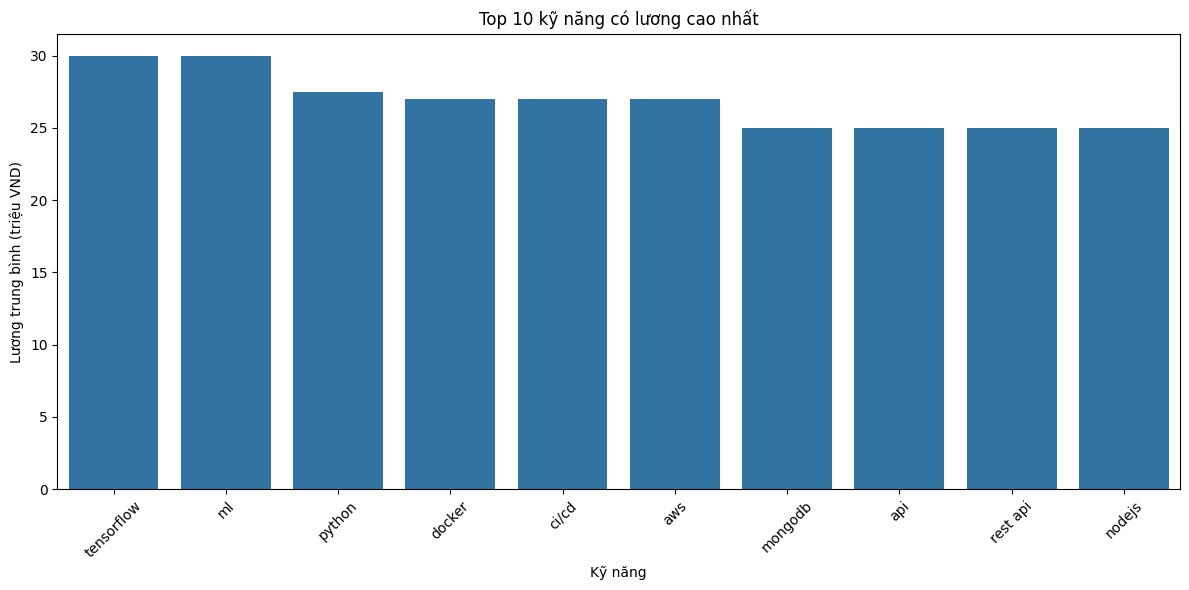

In [15]:
# 3. Phân tích mối quan hệ giữa lương và kỹ năng
# Tách kỹ năng từ cột skills
df['skills_list'] = df['skills'].str.lower().str.split(',\s*')

# Tạo DataFrame mới để phân tích kỹ năng và lương
skill_salary_data = []
for _, row in df.iterrows():
    for skill in row['skills_list']:
        skill_salary_data.append({
            'skill': skill.strip(),
            'salary': row['avg_salary']
        })

skill_salary_df = pd.DataFrame(skill_salary_data)

# Tính lương trung bình cho mỗi kỹ năng
skill_avg_salary = skill_salary_df.groupby('skill')['salary'].mean().reset_index()
skill_avg_salary = skill_avg_salary.sort_values('salary', ascending=False)

# Hiển thị top 10 kỹ năng có lương cao nhất
plt.figure(figsize=(12, 6))
sns.barplot(x='skill', y='salary', data=skill_avg_salary.head(10))
plt.title('Top 10 kỹ năng có lương cao nhất')
plt.xlabel('Kỹ năng')
plt.ylabel('Lương trung bình (triệu VND)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

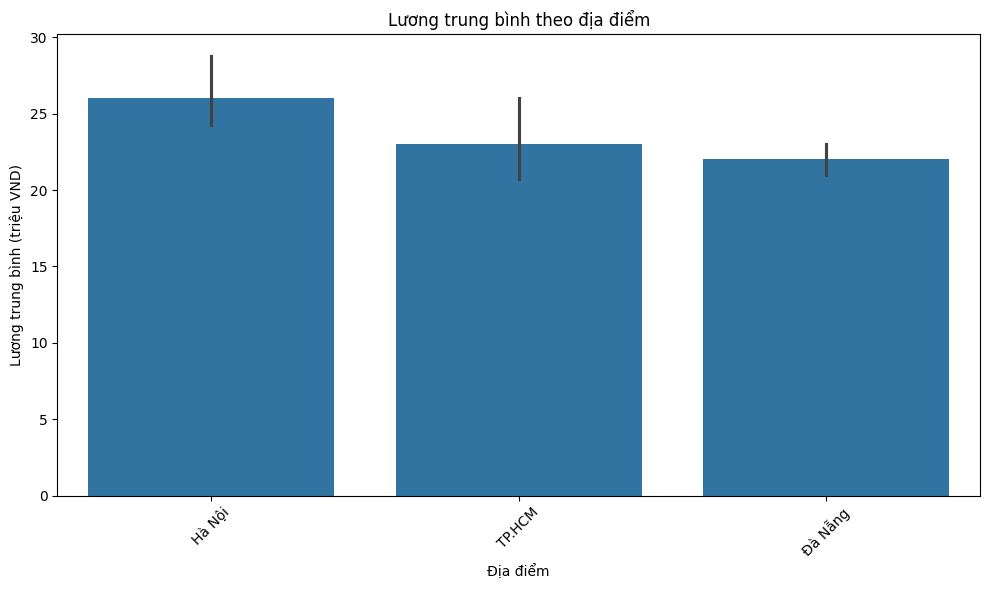

In [16]:
# 2. Phân tích lương theo địa điểm
plt.figure(figsize=(10, 6))
sns.barplot(x='location', y='avg_salary', data=df)
plt.title('Lương trung bình theo địa điểm')
plt.xlabel('Địa điểm')
plt.ylabel('Lương trung bình (triệu VND)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21468\4192448816.py:3: SyntaxWarning: invalid escape sequence '\s'
  df['skills_list'] = df['skills'].str.lower().str.split(',\s*')


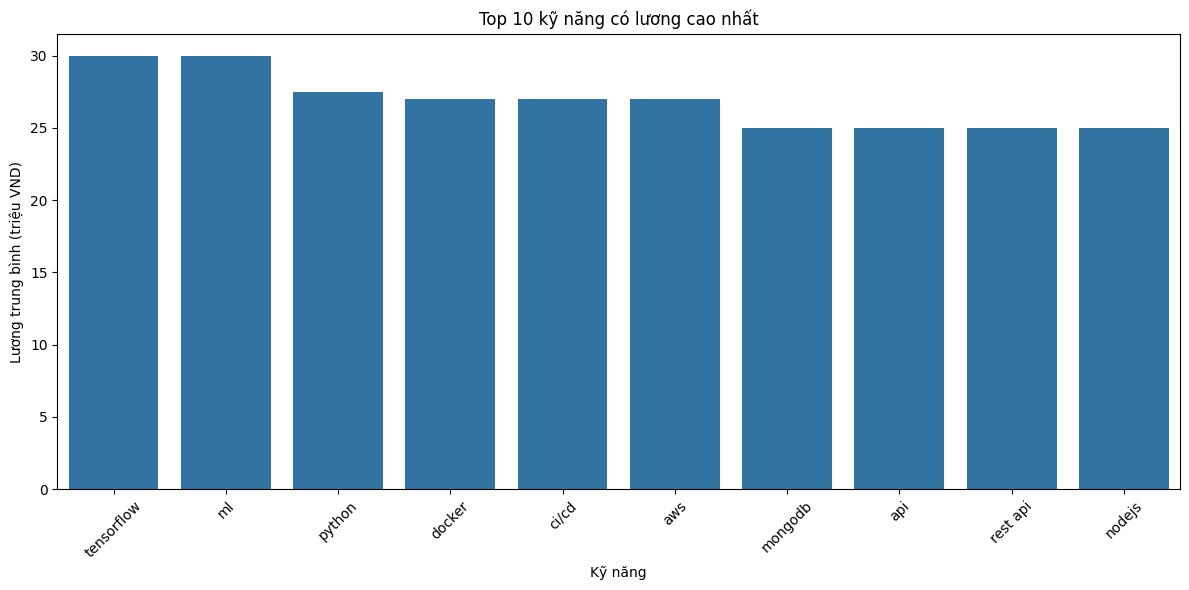

In [17]:
# 3. Phân tích mối quan hệ giữa lương và kỹ năng
# Tách kỹ năng từ cột skills
df['skills_list'] = df['skills'].str.lower().str.split(',\s*')

# Tạo DataFrame mới để phân tích kỹ năng và lương
skill_salary_data = []
for _, row in df.iterrows():
    for skill in row['skills_list']:
        skill_salary_data.append({
            'skill': skill.strip(),
            'salary': row['avg_salary']
        })

skill_salary_df = pd.DataFrame(skill_salary_data)

# Tính lương trung bình cho mỗi kỹ năng
skill_avg_salary = skill_salary_df.groupby('skill')['salary'].mean().reset_index()
skill_avg_salary = skill_avg_salary.sort_values('salary', ascending=False)

# Hiển thị top 10 kỹ năng có lương cao nhất
plt.figure(figsize=(12, 6))
sns.barplot(x='skill', y='salary', data=skill_avg_salary.head(10))
plt.title('Top 10 kỹ năng có lương cao nhất')
plt.xlabel('Kỹ năng')
plt.ylabel('Lương trung bình (triệu VND)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# 5. Tính toán thống kê về lương
print("\nThống kê về lương:")
print(f"Lương trung bình: {df['avg_salary'].mean():.2f} triệu VND")
print(f"Lương trung vị: {df['avg_salary'].median():.2f} triệu VND")
print(f"Lương thấp nhất: {df['min_salary'].min():.2f} triệu VND")
print(f"Lương cao nhất: {df['max_salary'].max():.2f} triệu VND")
print(f"Độ lệch chuẩn của lương: {df['avg_salary'].std():.2f} triệu VND")


Thống kê về lương:
Lương trung bình: 24.00 triệu VND
Lương trung vị: 23.50 triệu VND
Lương thấp nhất: 15.00 triệu VND
Lương cao nhất: 35.00 triệu VND
Độ lệch chuẩn của lương: 2.94 triệu VND


Phân bố địa lý

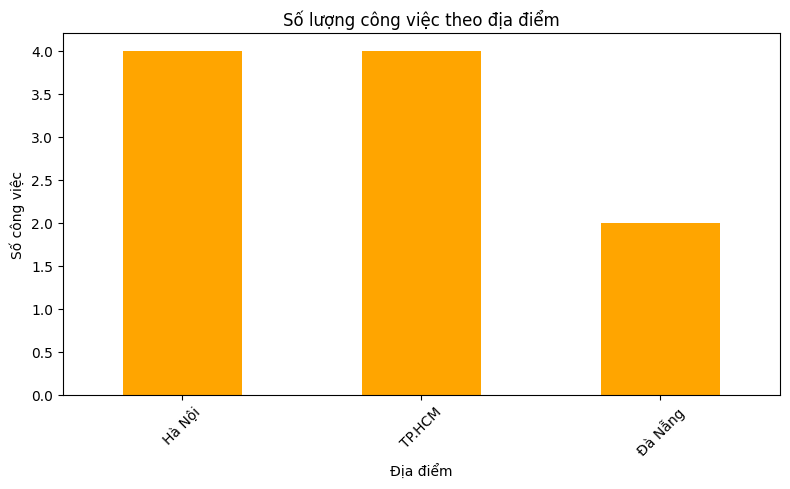

In [20]:
# Đếm số job theo location
location_counts = df['location'].value_counts()

# Vẽ biểu đồ
plt.figure(figsize=(8,5))
location_counts.plot(kind='bar', color='orange')
plt.title("Số lượng công việc theo địa điểm")
plt.xlabel("Địa điểm")
plt.ylabel("Số công việc")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
